# Stormwater Quality Data

(See README.md for the current project status)

PAHs and metals are known to travel into waterways after
wildfires, and this effect should be evident in the stormwater
data from Ventura and Sonoma Counties. Here, we will explore
the effects of two (maybe thre) fires &mdash; the Thomas, Hill,
and (Maybe) Tubbs fires &mdash; on the monitoring
stations nearby before and after.

Some fires could not be explored because no monitoring
stations were nearby (Solimar, Woolsey) and one (Maria) was
too recent to have stormwater data after the fire.

First... importing everything and standardizing the data:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from UsefulThings import ME_VR2,\
    MO_SPA,\
    MO_FIL,\
    MO_THO,\
    ME_CC,\
    saveThisGraph,\
    theToxicPAHs,\
    subsetOfTheMetals,\
    constituentsWeWant
from matplotlib.dates import YearLocator

# Standardizing data
scaledME_VR2 = MinMaxScaler().fit_transform(ME_VR2.values)
scaledMO_SPA = MinMaxScaler().fit_transform(MO_SPA.values)
scaledMO_FIL = MinMaxScaler().fit_transform(MO_FIL.values)
scaledME_CC = MinMaxScaler().fit_transform(ME_CC.values)
scaledMO_THO = MinMaxScaler().fit_transform(MO_THO.values)

# Converting back to Pandas Dataframe
ME_VR2data = pd.DataFrame(data=scaledME_VR2)
MO_SPAdata = pd.DataFrame(data=scaledMO_SPA)
MO_FILdata = pd.DataFrame(data=scaledMO_FIL)
ME_CCdata = pd.DataFrame(data=scaledME_CC)
MO_THOdata = pd.DataFrame(data=scaledMO_THO)

# Reapplying column and row labels
ME_VR2data.columns = constituentsWeWant
ME_VR2data.index = ME_VR2.index
MO_SPAdata.columns = constituentsWeWant
MO_SPAdata.index = MO_SPA.index
MO_FILdata.columns = constituentsWeWant
MO_FILdata.index = MO_FIL.index
ME_CCdata.columns = constituentsWeWant
ME_CCdata.index = ME_CC.index
MO_THOdata.columns = constituentsWeWant
MO_THOdata.index = MO_THO.index

print("Import Complete and data standardized!")

Import Complete and data standardized!


## Tubbs Fire

Chronologically, the first fire is the Tubbs fire, which
started on October 9, 2017, and ended on October 31, 2017.
Stormwater data from Santa Rosa is more difficult to analyze
as the reporting stations are hard to confidently locate.

In [2]:
print('Tubbs-relevant station data is pending.')

Tubbs-relevant station data is pending.


## Thomas Fire

The second fire is the Thomas fire, burning from December 5,
2017 to January 12, 2018. The relevant stations are ME-VR2,
MO-FIL, and MO-SPA.

![Thomas Fire](data/firedata/googleearthimages/thomasfire.png)

At the station on the Ventura river, just south of Ojai and
right in the middle of the burn area, the increase in metals
and PAHs is dramatic after the fire (right of the vertical
blue line). Not much can be said about post-metals in Santa
Paula, though PAHs are consistently elevated since. PAH data
in Fillmore is too sparse to draw conclusions and metals seem
to vary in a way not meaningfully impacted by the fire.

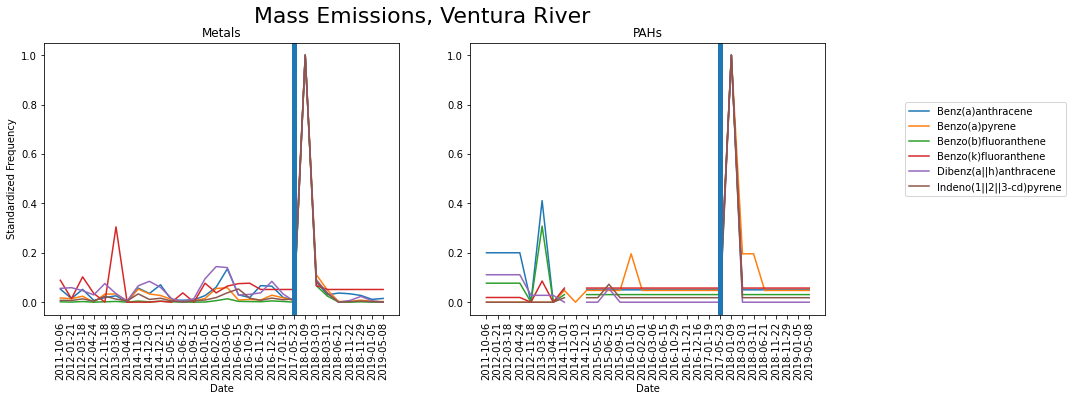

In [3]:
plt.figure(5, figsize=(14, 5))
plt.suptitle('Mass Emissions, Ventura River', fontsize=22)
plt.subplot(1, 2, 1)
plt.title('Metals')
for i in subsetOfTheMetals:
    plt.plot(ME_VR2data[i], label=i)
plt.ylabel('Standardized Frequency')
plt.xlabel('Date')
plt.axvline(x='2017-05-23', linewidth=5)
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.title('PAHs')
for i in theToxicPAHs:
    plt.plot(ME_VR2data[i], label=i)
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.axvline(x='2017-05-23', linewidth=5)
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8))
# saveThisGraph(filepathtosavepng='images/VRmetalPAH.png')

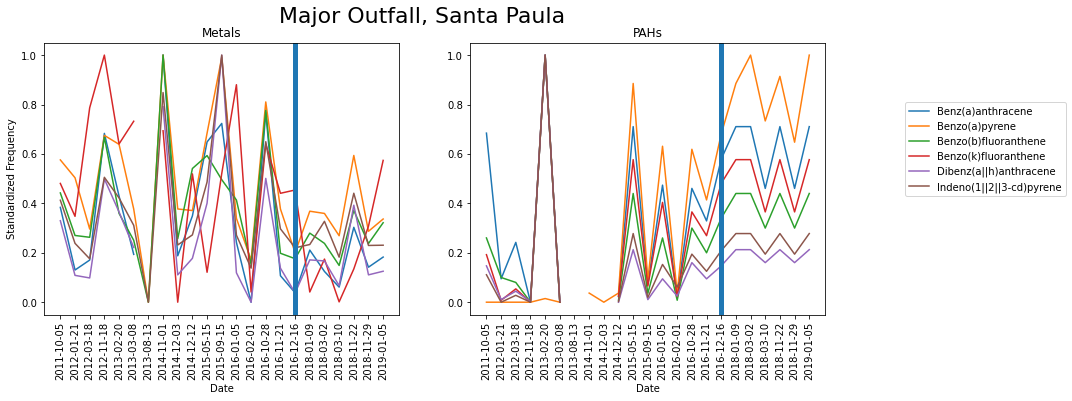

In [4]:
plt.figure(6, figsize=(14, 5))
plt.suptitle('Major Outfall, Santa Paula', fontsize=22)
plt.subplot(1, 2, 1)
plt.title('Metals')
for i in subsetOfTheMetals:
    plt.plot(MO_SPAdata[i], label=i)
plt.ylabel('Standardized Frequency')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.axvline(x='2016-12-16', linewidth=5)

plt.subplot(1, 2, 2)
plt.title('PAHs')
for i in theToxicPAHs:
    plt.plot(MO_SPAdata[i], label=i)
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.axvline(x='2016-12-16', linewidth=5)
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8))
# saveThisGraph(filepathtosavepng='images/SPAmetalPAH.png')

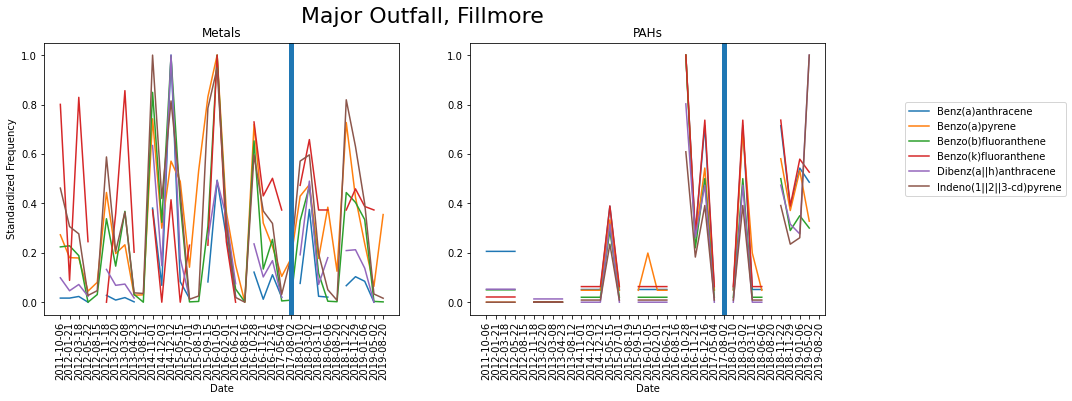

In [5]:
plt.figure(7, figsize=(14, 5))
plt.suptitle('Major Outfall, Fillmore', fontsize=22)
plt.subplot(1, 2, 1)
plt.title('Metals')
for i in subsetOfTheMetals:
    plt.plot(MO_FILdata[i], label=i)
plt.xlabel('Date')
plt.ylabel('Standardized Frequency')
plt.axvline(x='2017-08-02', linewidth=5)
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.title('PAHs')
for i in theToxicPAHs:
    plt.plot(MO_FILdata[i], label=i)
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.axvline(x='2017-08-02', linewidth=5)
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8))
# saveThisGraph(filepathtosavepng='images/FILmetalPAH.png')

## Hill Fire

The third fire is the Hill fire, which burned from November 8
to November 16, 2018. The relevant stations are MO-THO and
ME-CC.

![Hill Fire](data/firedata/googleearthimages/hillfire.png)

Calleguas Creek shows a intriguing spike in metals in December
2014, with no obvious explanation; no large wildfire occurred
in Ventura County that year. The long horizontal lines in the
PAH graph for Calleguas Creek are due to repeated values which
seem unlikely and suspicious. Why would e.g. Benzo(b)fluoranthene
remain at exactly 120 ng/L (pre-standardized value) every time
it was measured between 2014 an 2018?

One possibility is that the measuring of PAHs at this station
is done by people who are aware the maximum contaminant level
(MCL) for benzo(a)pyrene is 0.0002 mg/L (see https://www.epa.gov/ground-water-and-drinking-water/national-primary-drinking-water-regulations#Organic ),
which is 200 ng/L. Not only does the consistency make it seem
fabricated, but the fact that all the carcinogenic PAHs happen
to always be reported at levels below but pretty close to 200 ng/L
seems extra suspicious. (It may also be that the measurement
technique has an MDL around that range, but then why would you
use that method for determining PAH levels in stormwater?)

Anyway, in Thousand Oaks there is a periodic trend for metals
and PAHs which seems only minimally disturbed by the fire.

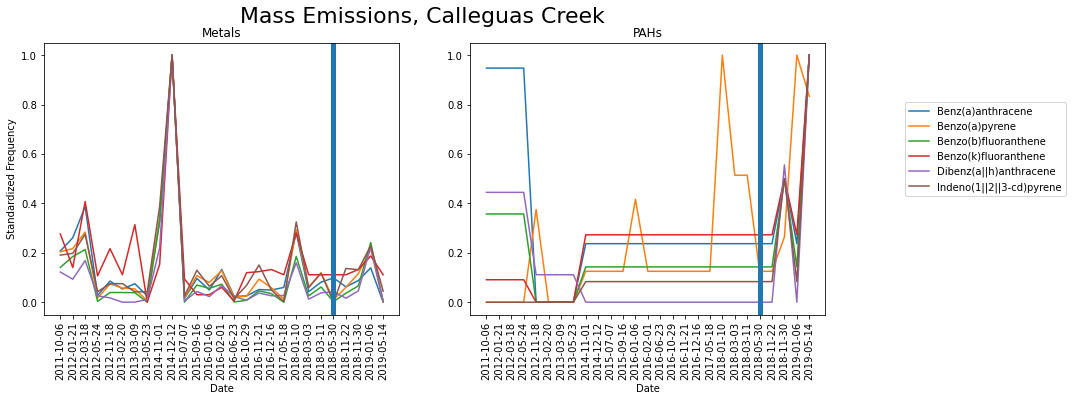

In [6]:
plt.figure(8, figsize=(14, 5))
plt.suptitle('Mass Emissions, Calleguas Creek', fontsize=22)
plt.subplot(1, 2, 1)
plt.title('Metals')
for i in subsetOfTheMetals:
    plt.plot(ME_CCdata[i], label=i)
plt.ylabel('Standardized Frequency')
plt.xlabel('Date')
plt.axvline(x='2018-05-30', linewidth=5)
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.title('PAHs')
for i in theToxicPAHs:
    plt.plot(ME_CCdata[i], label=i)
plt.xlabel('Date')
plt.axvline(x='2018-05-30', linewidth=5)
plt.xticks(rotation=90)
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8))
# saveThisGraph(filepathtosavepng='images/CCmetalPAH.png')

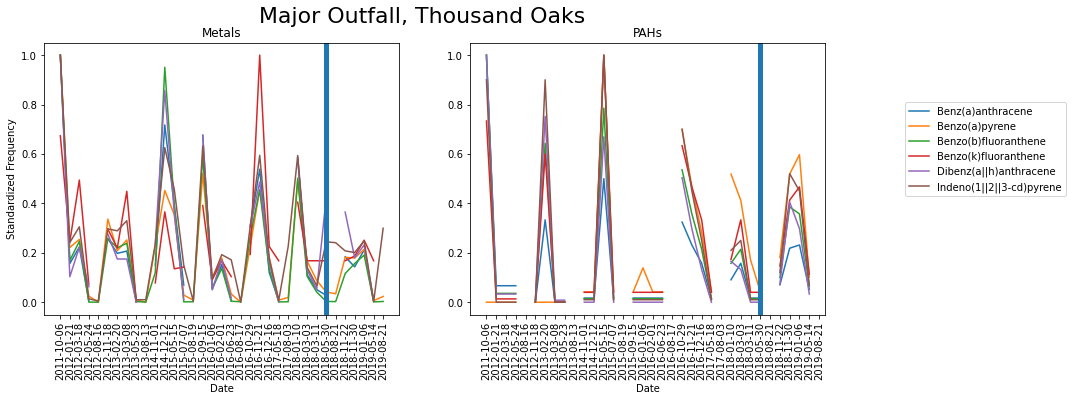

In [7]:
plt.figure(9, figsize=(14, 5))
plt.suptitle('Major Outfall, Thousand Oaks', fontsize=22)
plt.subplot(1, 2, 1)
plt.title('Metals')
for i in subsetOfTheMetals:
    plt.plot(MO_THOdata[i], label=i)
plt.xlabel('Date')
plt.ylabel('Standardized Frequency')
plt.axvline(x='2018-05-30', linewidth=5)
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.title('PAHs')
for i in theToxicPAHs:
    plt.plot(MO_THOdata[i], label=i)
plt.xlabel('Date')
plt.axvline(x='2018-05-30', linewidth=5)
plt.xticks(rotation=90)
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8))
# saveThisGraph(filepathtosavepng='images/THOmetalPAH.png')
